1> Importing the dependencies

In [ ]:
import numpy as np # transforms data into arrays and matrix from python
import pandas as pd # library for tabular data manipulation and analysis , tool to handle tabular data as dataframes and read cs files
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization tool
# sklearn, is one of the most widely used machine learning libraries in Python.
from sklearn.preprocessing import LabelEncoder # data preprocessed by converting distince string data into integers
from imblearn.over_sampling import SMOTE # prevents model to take biases towards majority class by generating synthetic samples for minority classes and prevent class imbalance
from sklearn.model_selection import train_test_split, cross_val_score , StratifiedKFold # splits data into training and testing dataset and cross evaulations prevents overfitting in which model learns from training dataset instead of detecting generalizing patterns
from sklearn.tree import DecisionTreeClassifier # ML Model that Splits data into branches using feature-based decisions
from sklearn.ensemble import RandomForestClassifier #ML Model that Trains multiple decision trees and averages their outputs
from xgboost import XGBClassifier # ML Model that Builds decision trees sequentially, each correcting errors of the previous one.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Evaluate model performance.
import pickle # Save and load Python objects as well deploys or reuses a trained model later


2> Data loading and understanding the csv dataframe


In [ ]:
# importing csv dataset to the drive
from google.colab import drive
drive.mount('/content/drive')

# Move the uploaded file into Drive (so it persists)
!cp /content/WA_Fn-UseC_-Telco-Customer-Churn.csv /content/drive/MyDrive/


Mounted at /content/drive
cp: cannot stat '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv': No such file or directory


In [ ]:
# reding the copied path of the csv file
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#{rows,columns}
df.shape

(7043, 21)

In [ ]:
# to get the generalized info of table with starting 5 rows and columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# dropping customerID column , not needed
df = df.drop(columns=['customerID'])

In [ ]:
# printing the unique value in all the columns

numerical_features_list=["tenure","MonthlyCharges","TotalCharges"] #Dtype set as int already

for col in df.columns:
  if col not in numerical_features_list:
    print(col,df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

3> Missing values in the TotalCharges column were replaced with 0

In [ ]:
# handling missing values
df[df["TotalCharges"]==" "]
len(df[df["TotalCharges"]==" "])

11

In [ ]:
# replacing emtry string with 0
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})

In [ ]:
# converting dtype of TotalCharges form object to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


4> Class imbalance identified in the target

In [ ]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


5> EDA Analysis


In [ ]:
# mean , median , mode
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# histogram plot
def plot_histogram(df,column_name): # drawing histogram with 2 arguments as dataframe with column name
  plt.figure(figsize=(5,3)) # Starts a new figure for the plot with a size of 5 inches wide and 3 inches tall
  sns.histplot(df[column_name], kde=True) # The kde=True adds a smooth curve showing the probability density
  plt.title(f"Distibution of {column_name}")

  col_mean=df[column_name].mean()
  col_median = df[column_name].median()

  plt.axvline(col_mean, color="red" , linestyle="--" , label="Mean") # ax = axis & vline = vertical line
  plt.axvline(col_median , color="green" , linestyle="-", label="Median")

  plt.legend()
  plt.show()

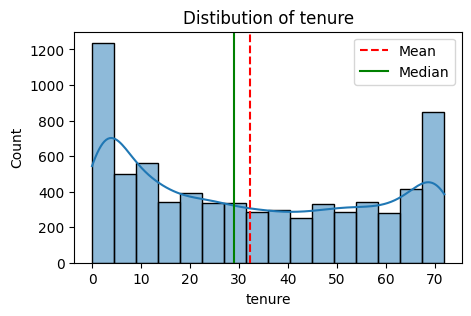

In [ ]:
plot_histogram(df,"tenure")

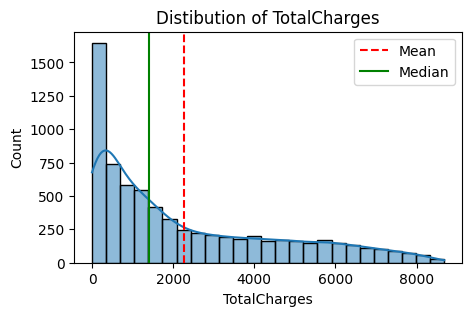

In [ ]:
plot_histogram(df,"TotalCharges")

In [ ]:
# box plot
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(df[column_name])
  plt.title(f"Distibution of {column_name}")
  plt.show()

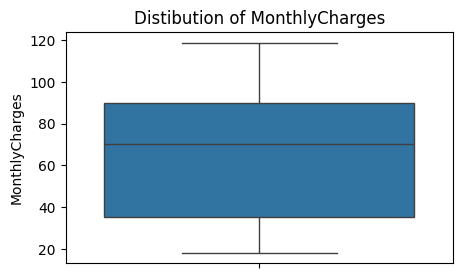

In [ ]:
plot_boxplot(df,"MonthlyCharges")

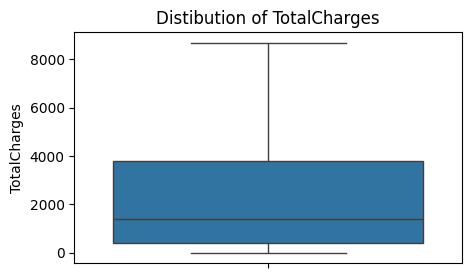

In [ ]:
plot_boxplot(df,"TotalCharges")

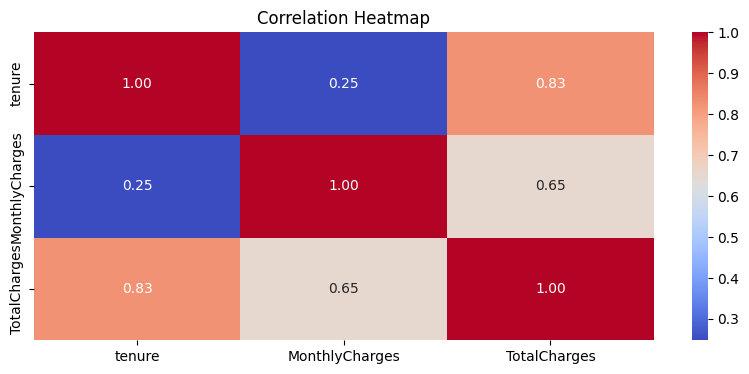

In [ ]:
# heat map
plt.figure(figsize=(10,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True,cmap="coolwarm", fmt=".2f")
#.corr() creates a correlation matrix pair wise to visualize how strongly the numeric features are related to each other
plt.title("Correlation Heatmap") # annot=True prints the correlation values inside each box of the heat map
plt.show() # fmt =".2f" round to 2 decimal places


6> Seperating columns on basis of object and float data type


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


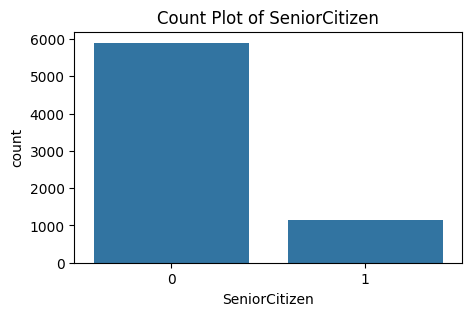

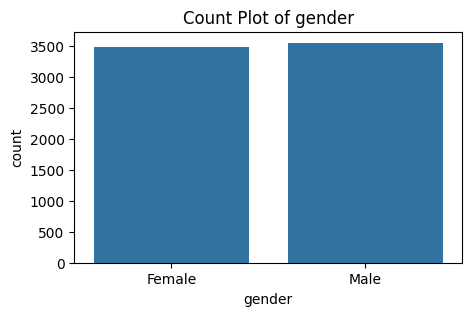

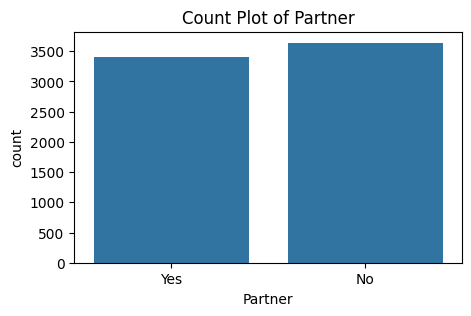

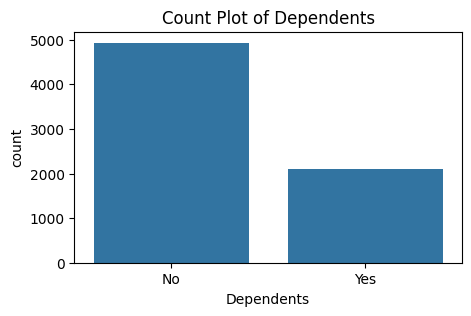

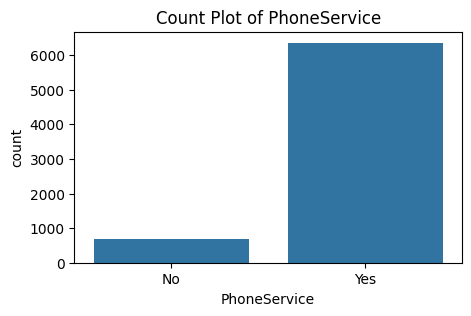

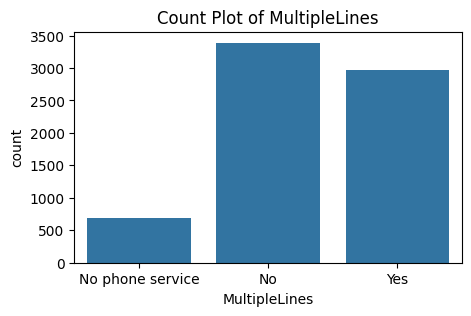

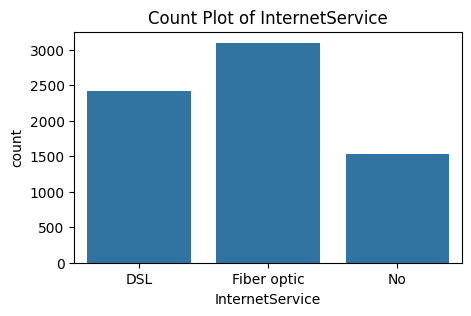

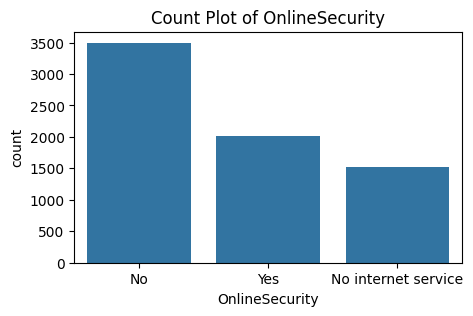

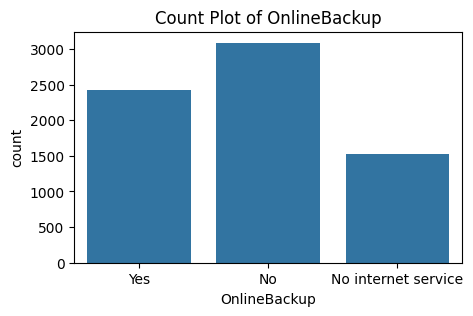

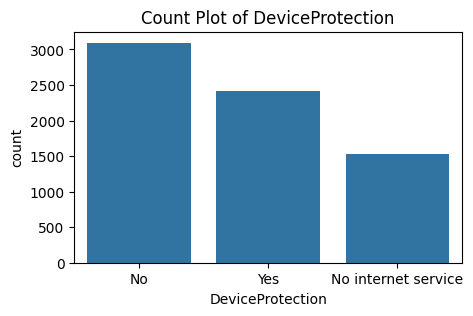

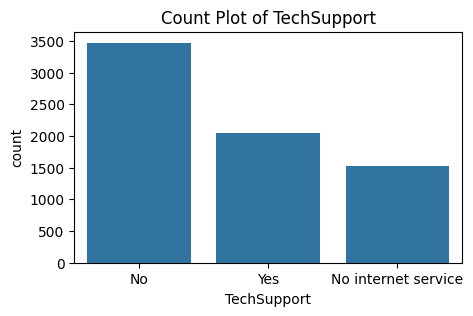

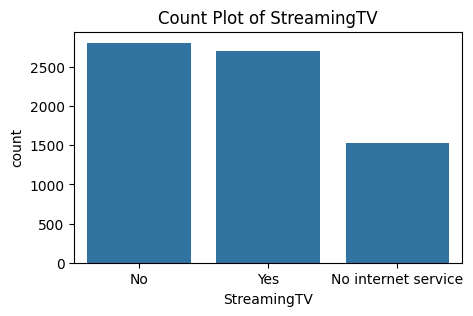

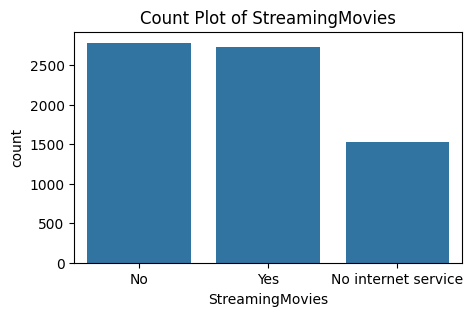

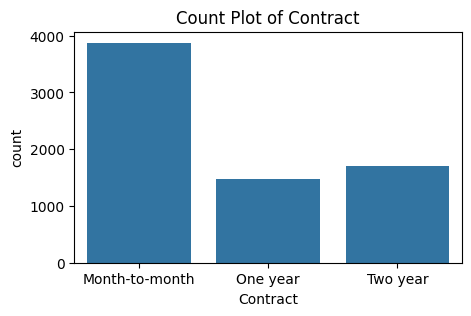

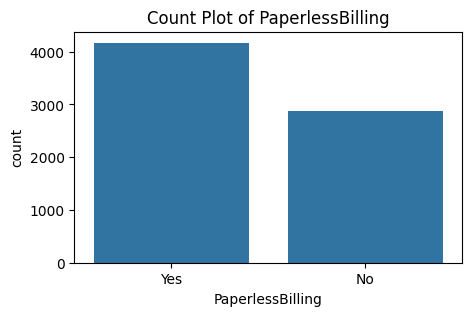

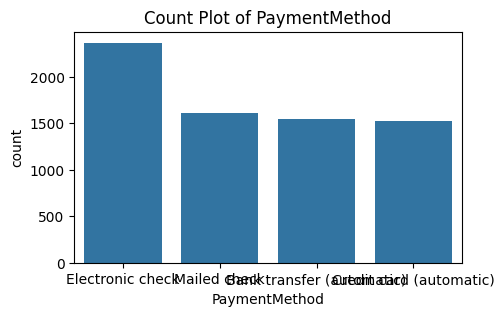

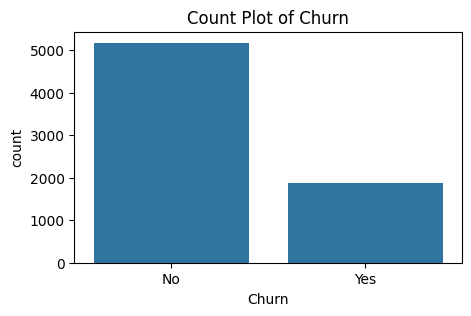

In [ ]:
# select all object data type columns and also include SeniorCitizen column
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols=['SeniorCitizen']+ object_cols

for col in object_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col]) # Seaborn function for categorical counts and The column whose categories you want to count as bar graph
    plt.title(f"Count Plot of {col}")
plt.show()


7> Using labelencoder to convert string to numeric

In [ ]:
# handling the target column first
df['Churn']= df["Churn"].replace({"Yes":1 , "No":0})
df.head(3)

/tmp/ipython-input-339207779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']= df["Churn"].replace({"Yes":1 , "No":0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
# labelencoding of other object datatype columns

object_columns=df.select_dtypes(include="object").columns
print(object_columns)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
encoders={}

for column in object_columns:   # Finds all unique categories in the column then Sorts them alphabetically
  label_encoder =LabelEncoder() # Assigns integer values starting from 0,1,2,...n
  df[column]= label_encoder.fit_transform(df[column]) # Finds all unique category values in the column and learns their mapping
  encoders[column]=label_encoder

with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f) # Save the encoders to a file

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


8> Splitting data into training and testing dataset

In [ ]:
# splitting the features and target
X=df.drop(columns=["Churn"])
Y=df["Churn"]

X_train , X_test , Y_train , Y_test = train_test_split(X ,Y ,test_size=0.2 ,random_state=42 )

In [ ]:
print(Y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


9> Applying SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

10> Training with default hyperparameters

In [ ]:
# dictionary of models
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    learning_rate=0.1,
    n_estimators=300,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight = (Y_train_smote.value_counts()[0] / Y_train_smote.value_counts()[1])
)
}

In [ ]:
# dictionary to store cross-validation scores
cv_scores = {}

# use stratified 5-fold cross-validation with shuffling for balanced splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# iterate through all models in your dictionary
for model_name, model in models.items():  # e.g., "DecisionTree": DecisionTreeClassifier(random_state=42)
    print(f"Training {model_name} with default parameters...")

    # perform cross-validation
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=cv, scoring="f1")

    # store scores in dictionary
    cv_scores[model_name] = scores

    # print results with mean and standard deviation for reliability
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-" * 70)


Training Decision Tree with default parameters...
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters...
Random Forest cross-validation accuracy: 0.85
----------------------------------------------------------------------
Training XGBoost with default parameters...
XGBoost cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [ ]:
# fold wise scores
cv_scores

{'Decision Tree': array([0.78117647, 0.79545455, 0.78809524, 0.78601067, 0.78473465]),
 'Random Forest': array([0.85017836, 0.84393758, 0.85144928, 0.84985163, 0.84280532]),
 'XGBoost': array([0.84790419, 0.84564565, 0.83625378, 0.85294118, 0.84191399])}

11> Selecting the random forset with highest accuracy score

In [ ]:
rfc = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_estimators=400,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1
)
rfc.fit(X_train_smote, Y_train_smote)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, n_jobs=-1, random_state=42)

12> Evaluate on test data

In [ ]:
print(Y_test.value_counts()) # class imbalance exists

Churn
0    1036
1     373
Name: count, dtype: int64


In [ ]:
# Predict probabilities
y_prob = rfc.predict_proba(X_test)[:, 1]

# Compute best threshold based on F1
from sklearn.metrics import precision_recall_curve
prec, rec, thr = precision_recall_curve(Y_test, y_prob)
f1 = 2 * (prec * rec) / (prec + rec + 1e-10)
best_idx = f1.argmax()
best_threshold = thr[best_idx]

print("Best Threshold:", best_threshold)

# Convert probabilities to labels
Y_test_pred = (y_prob >= best_threshold).astype(int)

# Evaluate
print("Accuracy Score:\n", accuracy_score(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

Best Threshold: 0.412948618952263
Accuracy Score:
 0.7608232789212207
Confusion Matrix:
 [[777 259]
 [ 78 295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.79      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [ ]:
# generating names of all features
model_data={"model": rfc , "features_names" : X.columns.tolist()}

# Saving it as a pickle file
with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

13> Save model and build predictive system

In [ ]:
# loading the saved model and encoders
with open("customer_churn_model.pkl","rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
features_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400, n_jobs=-1, random_state=42)


In [ ]:
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


14> Testing dataset with example



In [ ]:
input_data = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 2,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 53.85,
    'TotalCharges': 108.15
}


# convert data to dataframe
input_data_df = pd.DataFrame([input_data])

# Load the saved encoders
with open('encoders.pkl', 'rb') as file:
    encoders = pickle.load(file)

for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = input_data_df[column].apply(
            lambda x: x if x in encoder.classes_ else encoder.classes_[0]
        )
        input_data_df[column] = encoder.transform(input_data_df[column])

In [ ]:
print(input_data_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              3           53.85        108.15  


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
# making prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

[1]
Prediction: Churn
Prediction Probability: [[0.38840988 0.61159012]]
